In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from itertools import groupby

In [8]:
path = "./output/"
files = glob.glob(path + '/*.csv')

In [9]:
print(files)

['./output\\0_16000000pps_aggressive.csv', './output\\0_16000000pps_insane.csv', './output\\0_16000000pps_normal.csv', './output\\0_8000000pps_aggressive.csv', './output\\0_8000000pps_insane.csv', './output\\0_8000000pps_normal.csv', './output\\2_16000000pps_aggressive.csv', './output\\2_16000000pps_insane.csv', './output\\2_16000000pps_normal.csv', './output\\2_8000000pps_aggressive.csv', './output\\2_8000000pps_insane.csv', './output\\2_8000000pps_normal.csv', './output\\m_16000000pps_aggressive.csv', './output\\m_16000000pps_insane.csv', './output\\m_16000000pps_normal.csv', './output\\m_8000000pps_aggressive.csv', './output\\m_8000000pps_insane.csv', './output\\m_8000000pps_normal.csv']


In [10]:
def group_models(experiments):
    groups = {key: [] for key in set([experiment[11:-4] for experiment in experiments])} 
    for experiment in experiments:
        groups[experiment[11:-4]].append(experiment)
    return groups

groupped_models = group_models(files)
print(groupped_models)

{'8000000pps_aggressive': ['./output\\0_8000000pps_aggressive.csv', './output\\2_8000000pps_aggressive.csv', './output\\m_8000000pps_aggressive.csv'], '16000000pps_aggressive': ['./output\\0_16000000pps_aggressive.csv', './output\\2_16000000pps_aggressive.csv', './output\\m_16000000pps_aggressive.csv'], '8000000pps_insane': ['./output\\0_8000000pps_insane.csv', './output\\2_8000000pps_insane.csv', './output\\m_8000000pps_insane.csv'], '16000000pps_normal': ['./output\\0_16000000pps_normal.csv', './output\\2_16000000pps_normal.csv', './output\\m_16000000pps_normal.csv'], '16000000pps_insane': ['./output\\0_16000000pps_insane.csv', './output\\2_16000000pps_insane.csv', './output\\m_16000000pps_insane.csv'], '8000000pps_normal': ['./output\\0_8000000pps_normal.csv', './output\\2_8000000pps_normal.csv', './output\\m_8000000pps_normal.csv']}


In [11]:
column_names = ["bus_voltage", "shunt_voltage", "load_voltage", "curr_mA", "pwr_mW", "discrete"]
dfs = {key: [(lambda x : x.loc[x.discrete == 1])(pd.read_csv(path, header=0, names=column_names)) for path in groupped_models[key]] for key in groupped_models}

In [23]:
def plot_metric(metric):
    colors = ['indianred', 'limegreen', 'royalblue']
    #subplots = [plt.subplots(1, 1, figsize=(16, 9)) for _ in groupped_models]
    #figs, axis = list(zip(*subplots))
    figs, axis = plt.subplots(3, 2, figsize=(32, 30))
    for j, group in enumerate(groupped_models):
        ax = axis[j // 2, j % 2]
        for i, model_df in enumerate(dfs[group]):
            n = model_df.shape[0]
            seconds = 3 * 60
            to_exclude = n % seconds
            freq = n // seconds
            series = model_df['bus_voltage'].values[:n - to_exclude].reshape(-1, freq)
            series = np.sum(series, axis=1)
            t = np.arange(seconds)
            ax.plot(t, series, color=colors[i], label=f'A{i+1}')
        ax.set_xlabel('Time (s)', fontsize=20)
        ax.set_ylabel(metric, fontsize=20, labelpad=10.0)
        ax.set_title(group, fontsize=30, pad=30.0)
        ax.legend(ncol=len(groupped_models), loc='upper center', borderaxespad=-2, frameon=False)
        ax.grid(color='gainsboro', linestyle=':', linewidth=2)
        ax.set_xlim(left=0)
    #return {name: fig for name, fig in zip(groupped_models, figs)}

97
246
(180,)
172
221
(180,)
97
223
(180,)
6
221
(180,)
69
219
(180,)
177
262
(180,)
6
233
(180,)
155
224
(180,)
118
220
(180,)
87
219
(180,)
50
219
(180,)
176
222
(180,)
94
226
(180,)
107
219
(180,)
167
218
(180,)
75
219
(180,)
117
219
(180,)
137
225
(180,)


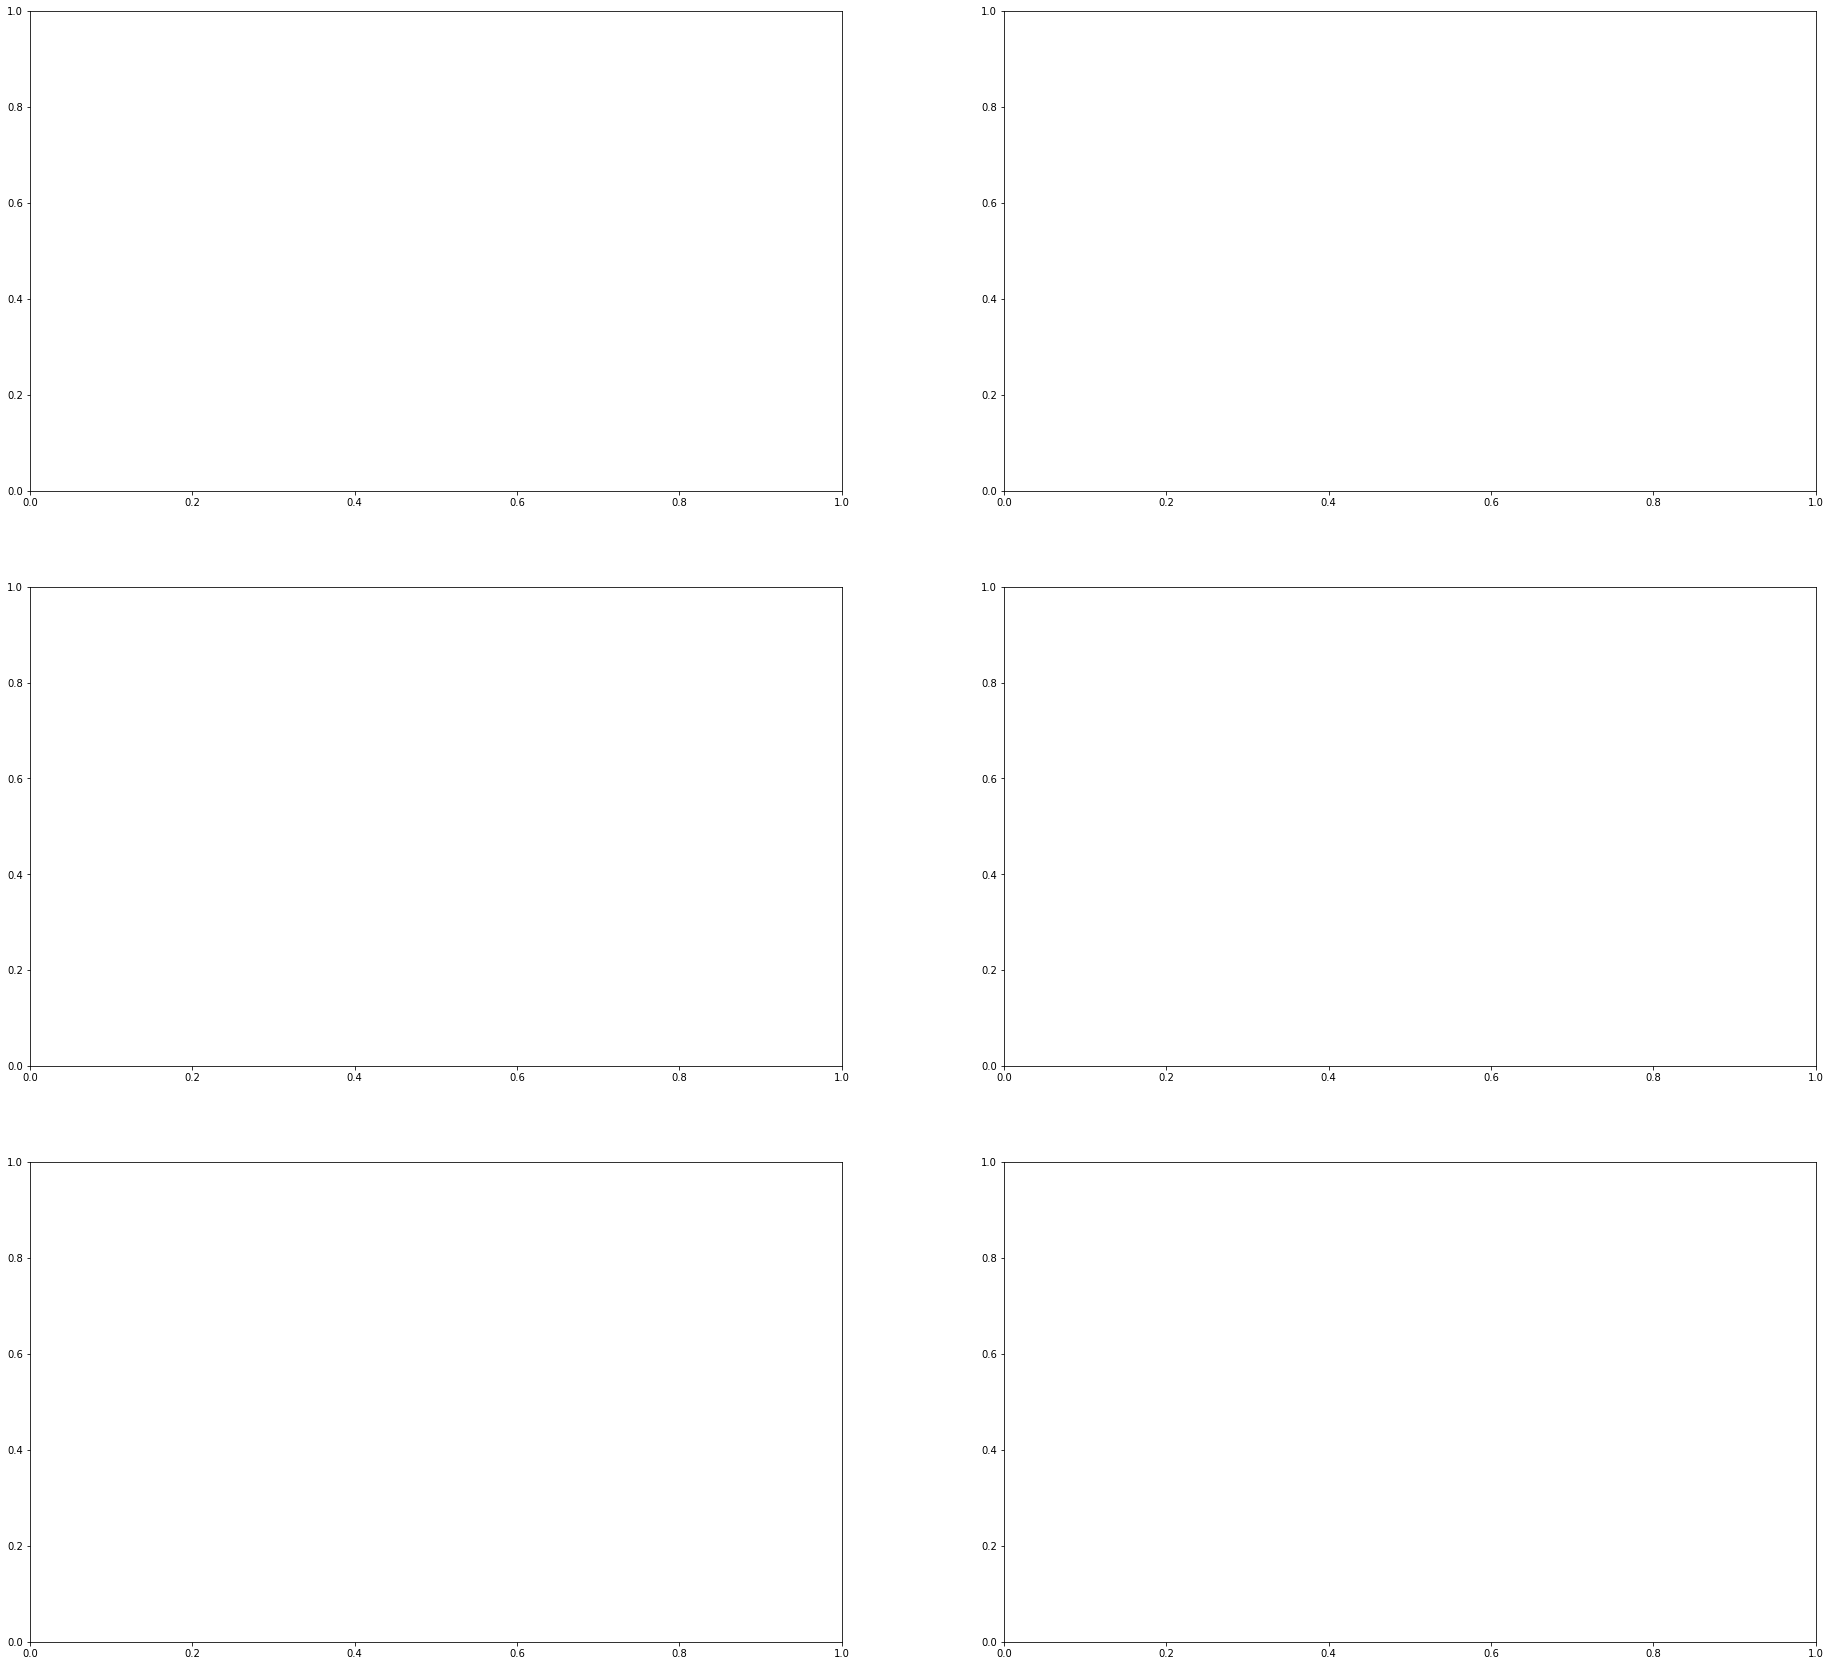

In [24]:
plot_metric('pwr_mW')